# D3. Pengenalan Python: Pengolahan Citra Dasar dan memahami channel warna pada OpenCV dan konversinya

## 1. Import yang dibutuhkan

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


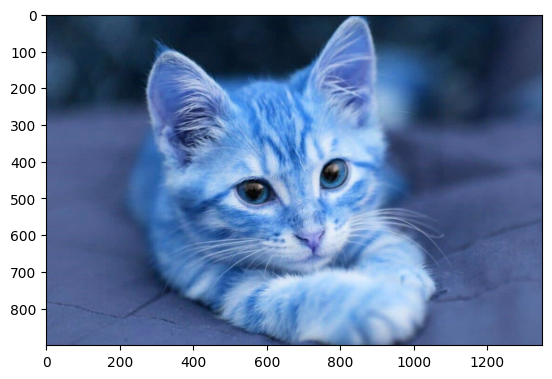

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/KULIAH SEMESTER 5/Pengolahan Citra dan Visi Komputer/Week2/images/kucing_oren.jpg')
plt.imshow(img)

## 2. OpenCV membaca image dan menyimpan dalam channel warna BGR (Blue Green Red) Tampilkan nilai pixel dan image

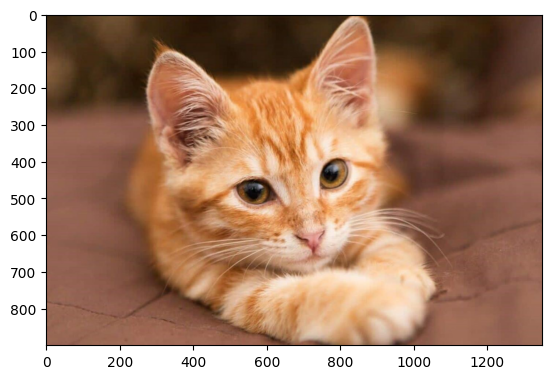

In [7]:
img2 = img
img3 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img3)

## 3. Menampilkan citra Grayscale, melakukan resizing, melakukan Flipping Menyimpan citra hasil

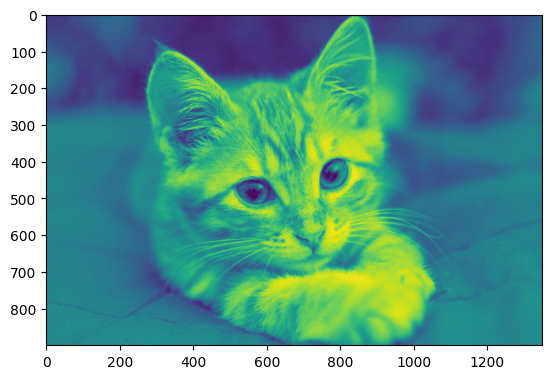

In [8]:
img_gray = cv.imread('/content/drive/MyDrive/KULIAH SEMESTER 5/Pengolahan Citra dan Visi Komputer/Week2/images/kucing_oren.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)



```
# This is formatted as code
```

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘gray’

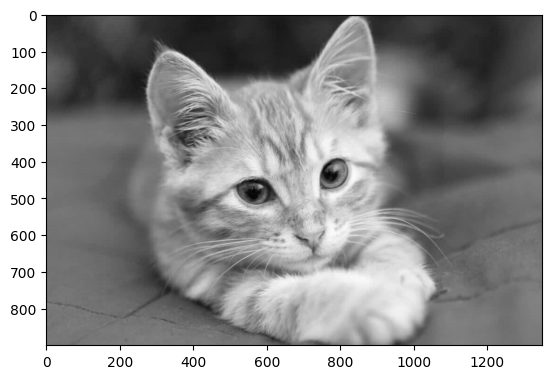

In [9]:
plt.imshow(img_gray, cmap='gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna ‘magma’

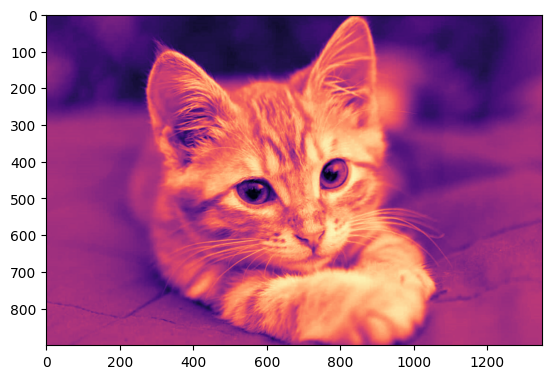

In [10]:
plt.imshow(img_gray, cmap='magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

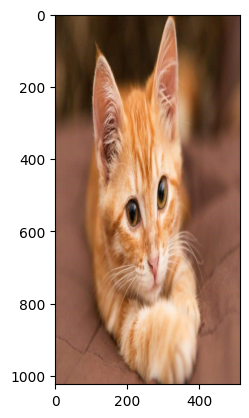

In [11]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

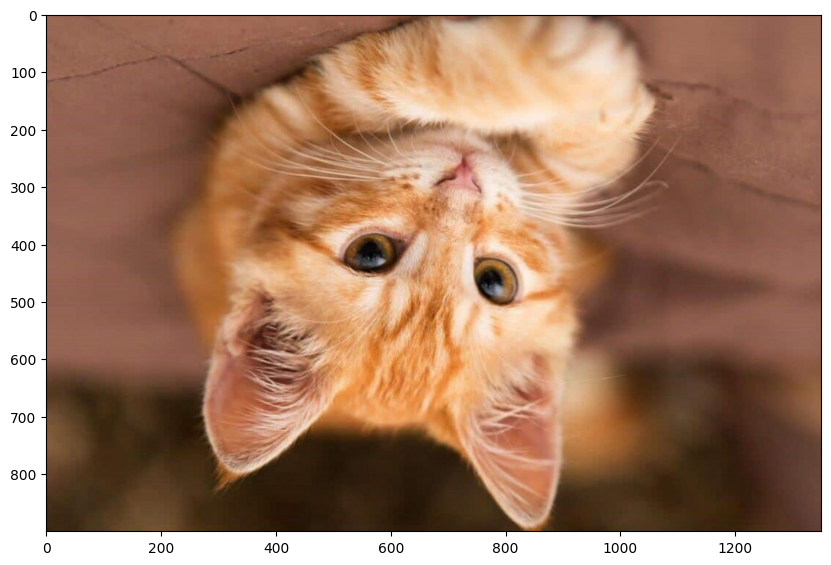

In [12]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(img5)


## 4. Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image dengan tipe data int16.

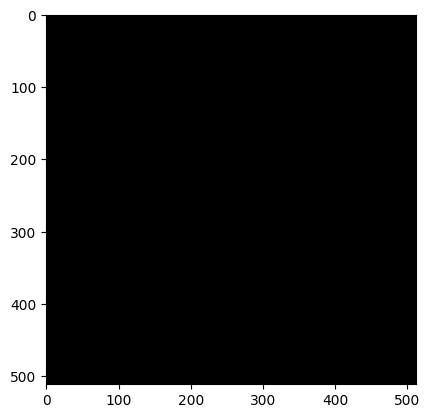

In [13]:
black_img = np.zeros((512, 512, 3), dtype=np.int16)
plt.imshow(black_img)

### Kemudian menambahkan bentuk persegi panjang sesuai koordinat pt1 dan pt2

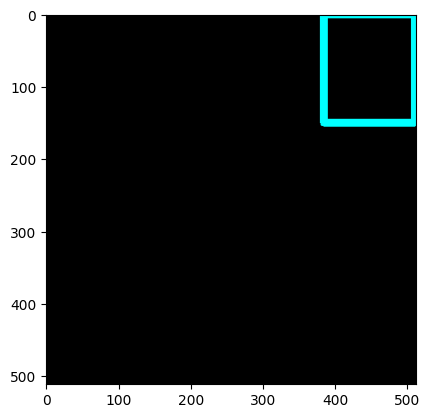

In [14]:
cv.rectangle(black_img, pt1=(384, 0), pt2=(510, 150), color=(0, 255, 255), thickness=10)
plt.imshow(black_img)

### Selanjutnya ditambah menambahkan bentuk persegi sesuai koordinat pt1 dan pt2 yang tertulis pada kode program.

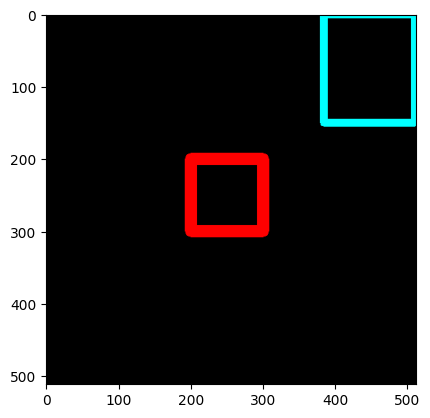

In [15]:
cv.rectangle(black_img, pt1=(200, 200), pt2=(300, 300), color=(255, 0, 0), thickness=15)
plt.imshow(black_img)

### Tahap selanjutnya ditambah menambahkan bentuk lingkaran sesuai radius yang tertulis pada kode program.

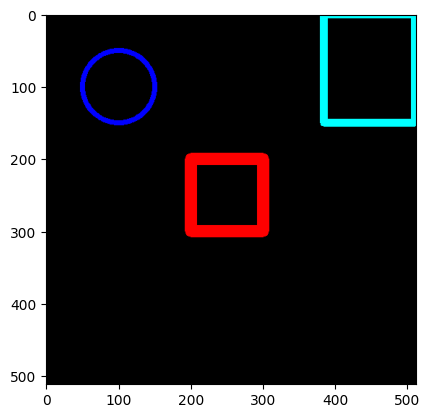

In [16]:
cv.circle(black_img, center=(100, 100), radius=50, color=(0, 0, 255), thickness=5)
plt.imshow(black_img)

### Kemudian dilakukan penambahan garis sesuai koordinat pt1 dan pt2 sebagai berikut.

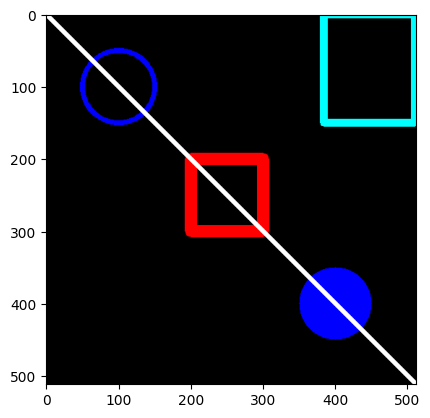

In [17]:
cv.circle(black_img, center=(400, 400), radius=50, color=(0, 0, 255), thickness=-1)
plt.imshow(black_img)

cv.line(black_img, pt1=(0, 0), pt2=(511, 511), color=(255, 255, 255), thickness=5)
plt.imshow(black_img)

### Penambahan text dengan font yang telah tertulis dengan ukuran yang sudah ditentukan.

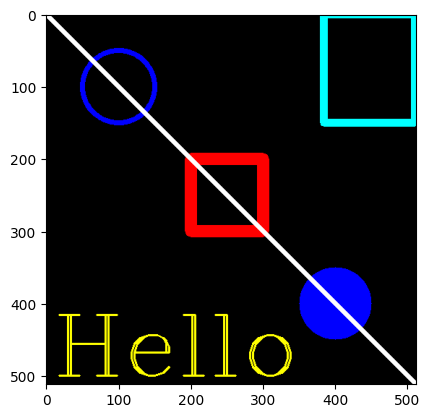

In [18]:
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(black_img, text='Hello', org=(10, 500), fontFace=font, fontScale=4, color=(255, 255, 0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

### Pembuatan black image kembali dilakukan dengan tipe data int32

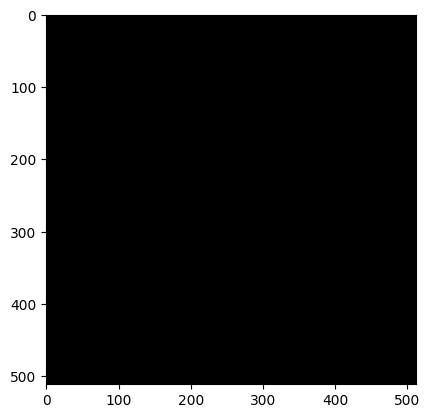

In [19]:
black_img2 = np.zeros((512, 512, 3), dtype=np.int32)
plt.imshow(black_img2)

### Berikut adalah kode program untuk inisialisasi NumPy array dengan tipe data int32

In [20]:
vertices = np.array([[100,300], [200,200], [400,300], [200,400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

### Array tersebut kemudian di reshape sebagai berikut

In [21]:
pts = vertices.reshape((-1, 1, 2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

### Penambahan polyline pada black image kedua yang telah dibuat.

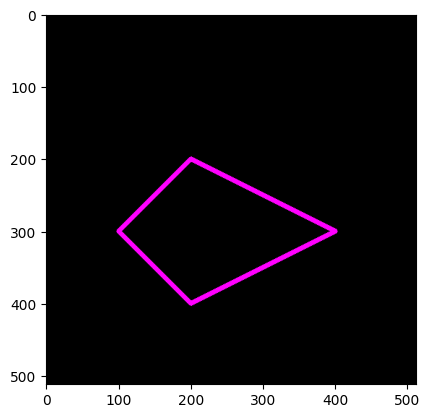

In [22]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255, 0, 255), thickness=5)
plt.imshow(black_img2)

# PERTANYAAN PRAKTIKUM D3


## 1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?  
**Jawaban:**  
- **Tanpa matplotlib** → gambar ditampilkan sesuai format asli OpenCV (BGR), warna bisa terlihat berbeda/terbalik jika tidak dikonversi ke RGB.  
- **Dengan matplotlib** → gambar ditampilkan dalam format RGB, lebih cocok untuk visualisasi di notebook, bisa ditambahkan judul, axis, atau colormap.  

---

## 2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32?  
**Jawaban:**  
- **int16** → tiap piksel hanya bisa menyimpan nilai dalam rentang `-32768` sampai `32767`.  
  Untuk citra, nilai negatif bisa error/ditafsirkan salah, dan nilai >255 tidak sesuai standar 8-bit per channel.  
- **int32** → rentang jauh lebih besar (`-2,147,483,648` sampai `2,147,483,647`), sehingga aman untuk operasi matematis lebih kompleks, tetapi ukuran memori lebih besar.  
  

---

## 3. Apakah kegunaan `from google.colab.patches import cv2_imshow`?  
**Jawaban:**  
Digunakan untuk menampilkan gambar di **Google Colab** karena fungsi bawaan OpenCV (`cv2.imshow`) tidak dapat berjalan di Colab.  
Dengan `cv2_imshow`, gambar bisa muncul langsung di output cell notebook.  

---

## 4. Apakah kegunaan `from skimage import io`?  
**Jawaban:**  
`io` dari scikit-image digunakan untuk **membaca dan menyimpan gambar** dengan berbagai format file.  
Contoh: `io.imread()` untuk membaca gambar menjadi array NumPy.  
Ini bisa menjadi **alternatif** selain `cv2.imread()` dari OpenCV.  

---


#TUGAS PRAKTIKUM D3



##1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga berubah?

Resolusi asli:  (900, 1350, 3)


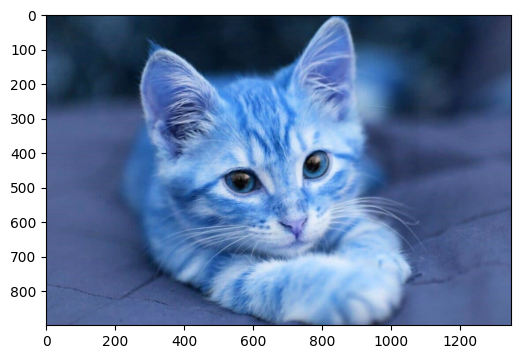

Resolusi setelah:  (900, 1350, 3)


In [23]:
print("Resolusi asli: ", img.shape)
plt.figure(figsize=(6,5))
plt.imshow(img)
plt.show()
print("Resolusi setelah: ", img.shape)


**Jawaban:** Tidak. figsize hanya mengatur ukuran tampilan gambar di plot (matplotlib), bukan jumlah piksel asli gambar. Resolusi gambar tetap sama.

##2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

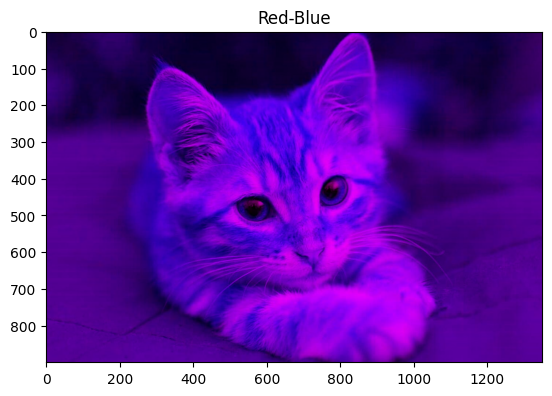

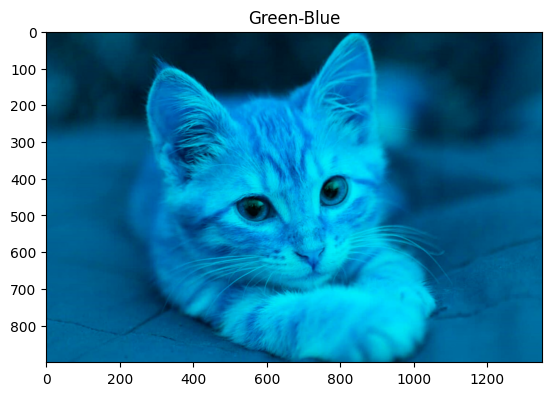

In [24]:
# Red-Blue (hilangkan Green)
rb = img.copy()
rb[:,:,1] = 0   # channel G = 0
plt.imshow(rb)
plt.title("Red-Blue")
plt.show()

# Green-Blue (hilangkan Red)
gb = img.copy()
gb[:,:,0] = 0   # channel R = 0
plt.imshow(gb)
plt.title("Green-Blue")
plt.show()


##3. Tampilkan image baris ke 20–115, kolom 25–120!

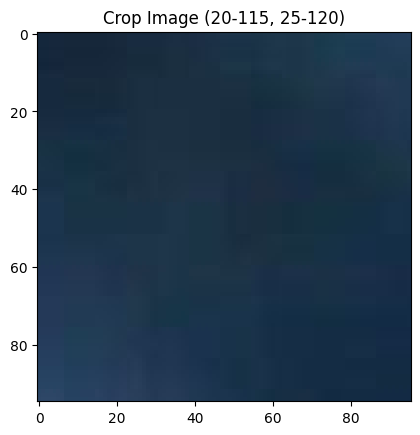

In [25]:
crop = img[20:115, 25:121]
plt.imshow(crop)
plt.title("Crop Image (20-115, 25-120)")
plt.show()

##4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

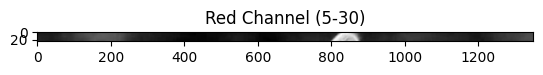

In [26]:
crop2 = img[5:30, :, 2]
plt.imshow(crop2, cmap='gray')
plt.title("Red Channel (5-30)")
plt.show()

##5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!

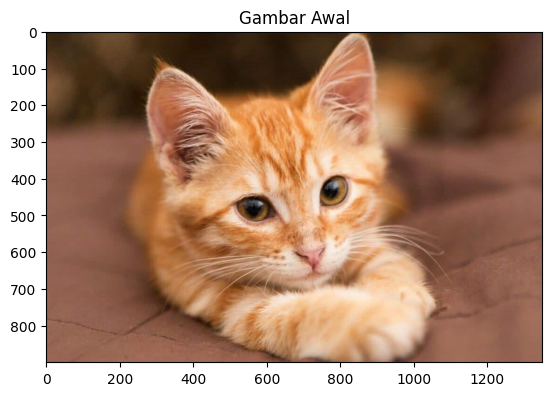

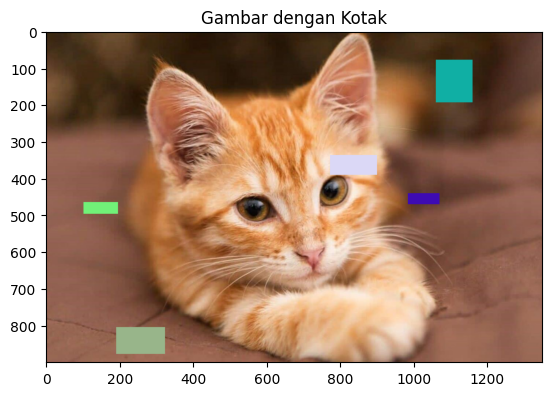

In [27]:
import random

img_5 =  img.copy()
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)

# simpan dulu gambar awal
img_awal = img_5.copy()

# ukuran gambar
h, w, _ = img_5.shape

# buat 5 kotak random
for i in range(5):
    x1 = random.randint(0, w-50)
    y1 = random.randint(0, h-50)
    x2 = random.randint(x1+20, min(w, x1+150))
    y2 = random.randint(y1+20, min(h, y1+150))

    color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))

    cv.rectangle(img_5, (x1, y1), (x2, y2), color, -1)


plt.imshow(img_awal)
plt.title("Gambar Awal")
plt.show()

plt.imshow(img_5)
plt.title("Gambar dengan Kotak")
plt.show()

##6. Tampilkan image dengan posisi terbalik!

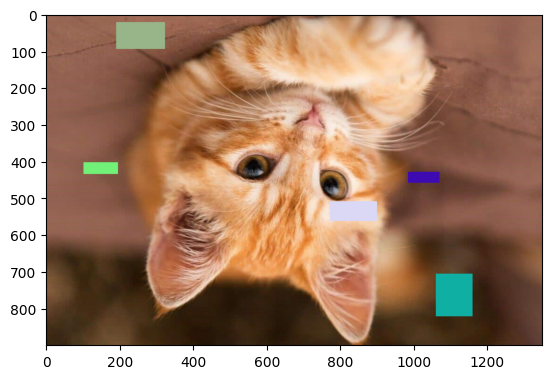

In [28]:
flipped = cv.flip(img_5, 0)

plt.imshow(flipped)

##7. Buat rectangle dan circle pada bagian wajah dari image foto s anda saat beraktifitas (bukan pasfoto).

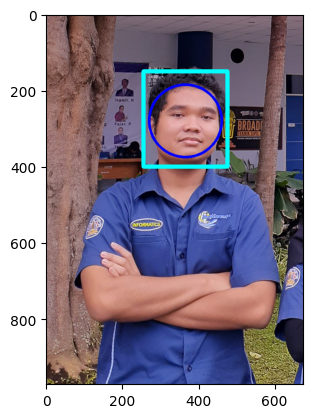

In [29]:
img2 = cv.imread('/content/drive/MyDrive/KULIAH SEMESTER 5/Pengolahan Citra dan Visi Komputer/Week2/images/foto_hology.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# plt.imshow(img2)

cv.circle(img2, center=(365, 280), radius=95, color=(0, 0, 255), thickness=5)
cv.rectangle(img2, pt1=(255, 150), pt2=(475, 400), color=(0, 255, 255), thickness=10)
plt.imshow(img2)

##8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

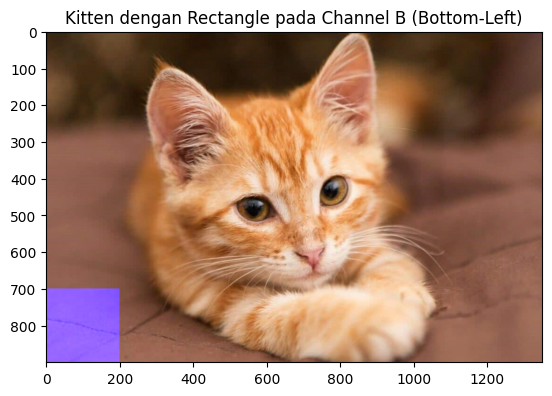

In [30]:
kitten = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(kitten)

# Ukuran gambar
h, w, _ = kitten.shape

# Buat rectangle 50x50 di sudut kiri bawah hanya pada channel B (index 2)
kitten[h-200:h, 0:200, 2] = 255

# Tampilkan
plt.imshow(kitten)
plt.title("Kitten dengan Rectangle pada Channel B (Bottom-Left)")
plt.show()

# TUGAS PRAKTIKUM KELOMPOK

## 1. Akses file image lokal (KTM) dan tampilkan menggunakan OpenCV dan Matplotlib

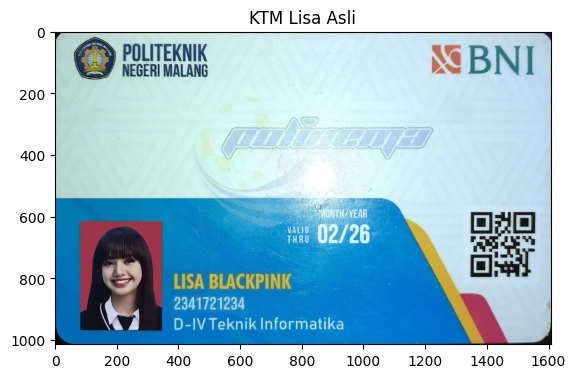

In [31]:
ktm = cv.imread('/content/drive/MyDrive/KULIAH SEMESTER 5/Pengolahan Citra dan Visi Komputer/Week2/images/lisa_ktm.jpg')

plt.title("KTM Lisa Asli")
plt.imshow(cv.cvtColor(ktm, cv.COLOR_BGR2RGB))



## 2. Tutup tiap bagian tertentu dari KTM tersebut menggunakan fungsi yang telah Anda pelajari. Kreasikan terkait dengan warna dan ukuran dari bentuk-bentuknya.

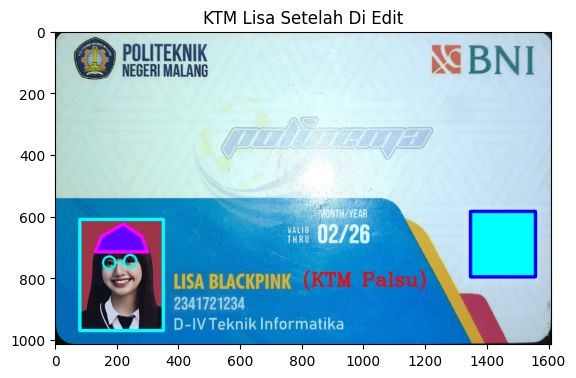

In [32]:
ktm_rgb = cv.cvtColor(ktm, cv.COLOR_BGR2RGB)

# Kacamata
cv.circle(ktm_rgb, center=(243, 745), radius=20, color=(0, 255, 255), thickness=5)
cv.circle(ktm_rgb, center=(175, 750), radius=20, color=(0, 255, 255), thickness=5)
cv.line(ktm_rgb, pt1=(225, 745), pt2=(193, 750), color=(0, 255, 255), thickness=5)

# Topi
vertices_ktm = np.array([[130,715], [150,665], [220,625], [280,665], [300,715]], dtype=np.int32)
pts_ktm = vertices_ktm.reshape((-1, 1, 2))
fill_color = (100, 0, 255)
cv.fillPoly(ktm_rgb, [pts_ktm], color=fill_color)
cv.polylines(ktm_rgb, [pts_ktm], isClosed=True, color=(255, 0, 255), thickness=10)

# Kotak
cv.rectangle(ktm_rgb, pt1=(80, 610), pt2=(350, 970), color=(0, 255, 255), thickness=10)

# Sensor QR
cv.rectangle(ktm_rgb, pt1=(1344, 584), pt2=(1554, 796), color=(0, 255, 255), thickness=-1)
cv.rectangle(ktm_rgb, pt1=(1344, 584), pt2=(1554, 796), color=(0, 0, 255), thickness=10)

# Teks
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(ktm_rgb, text='(KTM Palsu)', org=(800, 825), fontFace=font, fontScale=2, color=(255, 0, 0), thickness=4, lineType=cv.LINE_AA)
plt.imshow(ktm_rgb)

plt.title("KTM Lisa Setelah Di Edit")
plt.imshow(ktm_rgb)